# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

### Importing the training set

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values #cause we need a numpy array so we put 1:2

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler # For normalisation (We use standard scaler for standardisation)
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 1258): # this helps predict the nexr day value based on the last 60 entries (20 days in a financial month, so 3 months)
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train) # to convert into numpy array

In [5]:
print(X_train)
print(X_train.shape)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
(1198, 60)


In [6]:
print(y_train)
print(y_train.shape)

[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]
(1198,)


### Reshaping

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) # RNN expects 3D, if you wish to add new indicators

## Part 2 - Building and Training the RNN

### Importing the tensorflow.keras libraries and packages

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

### Initialising the RNN

In [9]:
regressor = Sequential() # regressor is the name of the object

### Adding the first LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(X_train.shape[1], 1))) # 50 neurons, return_sequences=True for stacked LSTM, input shape has just 2 dimensions (timesteps and indicators)
regressor.add(Dropout(0.2)) # 20% dropout

### Adding a second LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units=50,return_sequences=True)) # 50 neurons, input shape not needed as the previous layer already tells the RNN the input shape
regressor.add(Dropout(0.2)) # 20% dropout

### Adding a third LSTM layer and some Dropout regularisation

In [12]:
regressor.add(LSTM(units=50,return_sequences=True)) # 50 neurons, input shape not needed as the previous layer already tells the RNN the input shape
regressor.add(Dropout(0.2)) # 20% dropout

### Adding a fourth LSTM layer and some Dropout regularisation

In [13]:
regressor.add(LSTM(units=50)) # 50 neurons, return_sequences=False for last layer, input shape not needed as the previous layer already tells the RNN the input shape
regressor.add(Dropout(0.2)) # 20% dropout

### Adding the output layer

In [14]:
regressor.add(Dense(units=1)) # output layer (fully connected layer)

### Compiling the RNN

In [15]:
regressor.compile(optimizer='adam', loss='mean_squared_error') 
#Recommended optimizer is RMSprop, but adam is also a powerful one so we're using that
#mean squared error is used for regressors

### Fitting the RNN to the Training set

In [16]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)
# we wait for the loss to converge in choosing number of epochs
# batch size is the number of inputs per weight change

Epoch 1/100
38/38 [==============================] - 7s 45ms/step - loss: 0.0424
Epoch 2/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0068
Epoch 3/100
38/38 [==============================] - 2s 52ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0046
Epoch 6/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0049
Epoch 7/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0055
Epoch 8/100
38/38 [==============================] - 2s 55ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 2s 63ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 3s 73ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 3s 79ms/step - loss: 0.0039
Epoch 13/100
38/38 [=====

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [17]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values #cause we need a numpy array so we put 1:2

In [18]:
print(real_stock_price)

[[778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


### Getting the predicted stock price of 2017

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0) # verical conactenation
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60 : ].values

In [20]:
print(inputs)

[779.   779.66 777.71 786.66 783.76 781.22 781.65 779.8  787.85 798.24
 803.3  795.   804.9  816.68 806.34 801.   808.35 795.47 782.89 778.2
 767.25 750.66 774.5  783.4  779.94 791.17 756.54 755.6  746.97 755.2
 766.92 771.37 762.61 772.63 767.73 764.26 760.   771.53 770.07 757.44
 744.59 757.71 764.73 761.   772.48 780.   785.04 793.9  797.4  797.34
 800.4  790.22 796.76 795.84 792.36 790.9  790.68 793.7  783.33 782.75
 778.81 788.36 786.08 795.26 806.4  807.86 805.   807.14 807.48 807.08
 805.81 805.12 806.91 807.25 822.3  829.62 837.81 834.71 814.66 796.86]


In [21]:
inputs = inputs.reshape(-1,1) # to get the right numpy shape

In [22]:
print(inputs)

[[779.  ]
 [779.66]
 [777.71]
 [786.66]
 [783.76]
 [781.22]
 [781.65]
 [779.8 ]
 [787.85]
 [798.24]
 [803.3 ]
 [795.  ]
 [804.9 ]
 [816.68]
 [806.34]
 [801.  ]
 [808.35]
 [795.47]
 [782.89]
 [778.2 ]
 [767.25]
 [750.66]
 [774.5 ]
 [783.4 ]
 [779.94]
 [791.17]
 [756.54]
 [755.6 ]
 [746.97]
 [755.2 ]
 [766.92]
 [771.37]
 [762.61]
 [772.63]
 [767.73]
 [764.26]
 [760.  ]
 [771.53]
 [770.07]
 [757.44]
 [744.59]
 [757.71]
 [764.73]
 [761.  ]
 [772.48]
 [780.  ]
 [785.04]
 [793.9 ]
 [797.4 ]
 [797.34]
 [800.4 ]
 [790.22]
 [796.76]
 [795.84]
 [792.36]
 [790.9 ]
 [790.68]
 [793.7 ]
 [783.33]
 [782.75]
 [778.81]
 [788.36]
 [786.08]
 [795.26]
 [806.4 ]
 [807.86]
 [805.  ]
 [807.14]
 [807.48]
 [807.08]
 [805.81]
 [805.12]
 [806.91]
 [807.25]
 [822.3 ]
 [829.62]
 [837.81]
 [834.71]
 [814.66]
 [796.86]]


In [23]:
inputs = sc.transform(inputs) # to scale the inputs

In [24]:
X_test = []
for i in range(60, 80): # here we just have 20 values so 60-80
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test) # to convert into numpy array

# To create a structure containing the previous 60 stock prices of the given stock

In [25]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) 
# to get the 3D structure as expected by the RNN

In [26]:
predicted_stock_price = regressor.predict(X_test)
# To predict the values

1/1 [==============================] - 1s 904ms/step


In [27]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# To inverse the scaling

In [28]:
print(predicted_stock_price)

[[774.5087 ]
 [771.986  ]
 [771.3359 ]
 [772.10095]
 [774.8478 ]
 [780.0808 ]
 [785.7452 ]
 [789.224  ]
 [790.5002 ]
 [790.4254 ]
 [789.8334 ]
 [789.1465 ]
 [788.6419 ]
 [788.83813]
 [789.6465 ]
 [793.30084]
 [799.4946 ]
 [806.909  ]
 [812.23157]
 [810.8539 ]]


### Visualising the results

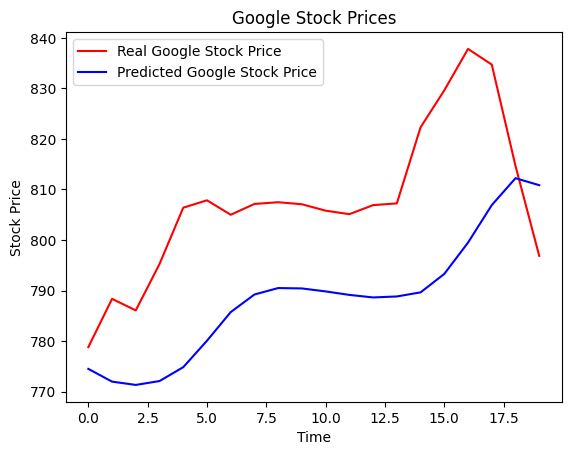

In [29]:
plt.plot(real_stock_price, color='red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()